<img src=images/data_models.png width=2/>

## Python Data Science Tools - Data Models

**What are data models and why are they useful?**



In [66]:
# Import the libraries we are going to use
import pandas as pd
import numpy as np
import xarray as xr
import iris

### Tabular Data - Pandas

**References:<br>Pandas documentaiton -> https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html**

All of us will be familiar with tabular data - values arranged into rows and columns to convey relations between data.

|Name|Age|Height|
|---|---|---|
|Alice|28|1.86|
|Bob|16|1.75|
|Charlie|99|1.83|

We may be familiar with tools that allow us to work with tabular data, such as Excel, MATLAB, databases (MongoDB, SQL), or pen & paper.

A Python data structure we could use to represent a table is a dictionary, where the `keys` are the column labels and the `values` are a list of the values in each column:

In [42]:
table = {'Name':  ['Alice', 'Bob', 'Charlie'],
         'Age':   [28, 26, 99],
         'Height':[1.86, 1.75, 1.83]}
table

{'Name': ['Alice', 'Bob', 'Charlie'],
 'Age': [28, 26, 99],
 'Height': [1.86, 1.75, 1.83]}

This is a perfectly correct way to store the data containted in a table, but is not particularly useful for interacting with the data in ways we expect to for tabular data. 

For instance, selecting a row from the table represented with the dictionary is not simple:

In [43]:
row1 = [table['Name'][1],
        table['Age'][1],
        table['Height'][1]]

row1

['Bob', 26, 1.75]

This is a bit cumbersome and for a table with 20 columns would get frustrating and messy.

So we could implement a function to get a row for us:

In [44]:
def get_row(i, table):
    row = []
    for key in table.keys():
        row.append(table[key][i])
    return row

get_row(1, table)

['Bob', 26, 1.75]

This works and will scale to a table with 20 columns just fine, but it involved engineering and I'm lazy so don't want to engineer every feature of a table when I need it.

Thankfully [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) is a Python library which allows us to work with tabular data using a data model called a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame):

In [45]:
df = pd.DataFrame(table)
df

,Name,Age,Height
0,Alice,28,1.86
1,Bob,26,1.75
2,Charlie,99,1.83


Already we can see that this is a much more familiar model for intarcting with tabular data than a dictionary. On top of being pretty, Pandas has implemented a whole spectrum of features and functionality that makes working with tabular data more simple and powerful*.

_*Pandas is underpinned with some very fast C code, which leads to operations on huge tables of data running at lightning speed._

**What can we do with a Pandas DataFrame?**

#### Indexing rows and columns

This is easy with a DataFrame and fundamental to interacting with it. We can select columns or rows either by index or values, in a number of ways:

In [46]:
df

,Name,Age,Height
0,Alice,28,1.86
1,Bob,26,1.75
2,Charlie,99,1.83


In [47]:
# Columns can be indexed like a Python dictionary
df['Name']

0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object

In [48]:
# But columns are also attributes of the DataFrame object
df.Name

0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object

In [49]:
# Rows can be retrieved by index using iloc[]
df.iloc[1]

Name       Bob
Age         26
Height    1.75
Name: 1, dtype: object

In [50]:
# Or retrieved by index value using loc[] (which in this case returns the same as iloc[])
df.loc[1]

Name       Bob
Age         26
Height    1.75
Name: 1, dtype: object

In [39]:
# Rows can also be selected based on their values
df.loc[df.Name == 'Bob']

,Name,Age,Height
1,Bob,46,1.75


The index of the table is currently an integer, but we can set the index of the table to whatever we want

In [40]:
df_name = df.set_index('Name')
df_name

,Age,Height
Name,,
Alice,28,1.86
Bob,46,1.75
Charlie,99,1.93


In [41]:
# Now we have changed the index, we can use loc[] to get a row based on a Name value
df_name.loc['Bob']

Age       46.00
Height     1.75
Name: Bob, dtype: float64

#### Sort rows

Pandas also gives us the power to sort a DataFrame into orders that are easier to work with. The table is already sorted in alphabetical order for names, but we can also order it according to index, heights or age:

In [53]:
# We can sort according to index, including in reverse order
df.sort_index(ascending=False)

,Name,Age,Height
2,Charlie,99,1.83
1,Bob,26,1.75
0,Alice,28,1.86


In [54]:
# We can also sort by the values of any column
df.sort_values(by="Age")

,Name,Age,Height
1,Bob,26,1.75
0,Alice,28,1.86
2,Charlie,99,1.83


In [55]:
# And of course reverse the order
df.sort_values(by="Height", ascending=False)

,Name,Age,Height
0,Alice,28,1.86
2,Charlie,99,1.83
1,Bob,26,1.75


#### Stats

Pandas includes makes it easy to perform statistical operations on DataFrames:

In [67]:
# Calculate the mean of all the columns
df.mean()

Age       51.000000
Height     1.813333
dtype: float64

#### Extend

Pandas makes it easy to extent DataFrames by adding columns, concatenating or merging them:

In [68]:
table2 = {'Name': ['Daniel', 'Evan', 'Fred'],
          'Age': [43, 15, 31], 
          'Height': [1.53, 1.89, 1.56]}

df2 = pd.DataFrame(table2)
df2

,Name,Age,Height
0,Daniel,43,1.53
1,Evan,15,1.89
2,Fred,31,1.56


In [69]:
# It is easy to concatenate DataFrames
pd.concat([df, df2])

,Name,Age,Height
0,Alice,28,1.86
1,Bob,26,1.75
2,Charlie,99,1.83
0,Daniel,43,1.53
1,Evan,15,1.89
2,Fred,31,1.56


In [70]:
# It is possible to reset the indices when concatenating
pd.concat([df, df2], ignore_index=True)

,Name,Age,Height
0,Alice,28,1.86
1,Bob,26,1.75
2,Charlie,99,1.83
3,Daniel,43,1.53
4,Evan,15,1.89
5,Fred,31,1.56


In [74]:
# It is also easy to add a new column to a DataFrame with insert()
df2.insert(loc=2, column='Weight', value=[89, 71, 74])
df2

,Name,Age,Weight,Height
0,Daniel,43,89,1.53
1,Evan,15,71,1.89
2,Fred,31,74,1.56


In [83]:
# Pandas also supports database style merge() operations
df.merge(df2, how='outer')

,Name,Age,Height,Weight
0,Alice,28,1.86,NaN
1,Bob,26,1.75,NaN
2,Charlie,99,1.83,NaN
3,Daniel,43,1.53,89.0
4,Evan,15,1.89,71.0
5,Fred,31,1.56,74.0


#### Plot

Finally, Pandas also includes some quick plotting functionality to make it easy to visualise your data.

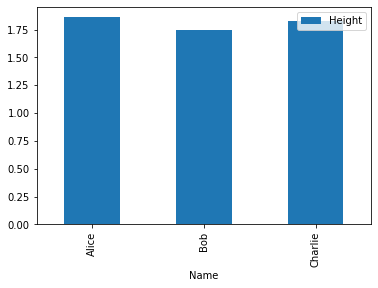

In [84]:
# The plot() method supports many kinds of plots
df.plot(x='Name', y='Height', kind='bar')

There is much much more to Pandas. Please see [list of example notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#pandas-for-data-analysis) and [docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)

### Gridded Data - Iris / Xarray
